In [2]:
import numpy as np
import numpy.random as npr
import os
import sys
import shutil
import matplotlib.pyplot as plt

currentdir = os.getcwd() 
parent_dir = os.path.dirname(currentdir)
sys.path.insert(0, parent_dir) 
from df_utils_prolific import *
#sys.path.insert(0,'../utils')
#print(sys.path)
from lp_utils import *

import pyomo.environ as pyo
import numpy as np
from pyomo.opt import SolverFactory
import matplotlib.pyplot as plt

from itertools import combinations_with_replacement, permutations, product
import pickle
from helper_solution_analysis import *
from run_strategies import *
from matplotlib.colors import ListedColormap
import pandas as pd
import seaborn as sns
sns.set(font_scale=2, style = 'ticks', palette = 'deep') 

import gym
import gym_furniture

In [3]:
cur_dir =  os.getcwd()
parent_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
#data_file = 'data/prolific/data_FurnitureCompany_2022-06-13_14-10.csv'
data_file ='data/prolific/data_FurnitureCompany_2022-07-07_11-02.csv'
data_path = os.path.join(parent_dir, data_file)

df, df_model, df_ge, df_vp_sol, df_likert,  df_actions, df_built, df_resources, df_play_times = decompose_csv(data_path)
df_complete_sol =  get_complete_sol(df_resources)

read cache


In [4]:
df_built.vp.unique()

array([94, 95, 97, 119, 120, 121, 122, 124, 125, 126, 127, 130, 131, 133,
       134, 135, 137, 139, 140, 141, 142, 144, 145, 146, 149, 150, 151,
       155, 156, 163, 166, 167, 168, 169, 171, 172, 173, 176, 177, 181,
       184, 186, 187, 188, 189, 190, 191, 192, 193, 194, 196, 197, 198,
       199, 202, 204, 205, 206, 208, 211, 214, 216, 217, 218, 220, 222,
       223, 224, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236, 237,
       238, 244, 245, 246, 247, 248, 249], dtype=object)

In [5]:
load_lp_model(modelfile = 'online_model.lp')

(array([[52., 49., 26., 30., 23., 26.],
        [38., 21., 26., 30., 23., 26.],
        [40., 44., 26., 30., 23., 26.],
        [46., 48., 26., 30., 23., 26.],
        [57., 97., 26., 30., 23., 26.],
        [54., 49., 26., 30., 23., 26.],
        [25., 58., 26., 30., 23., 26.],
        [49., 44., 26., 30., 23., 26.],
        [47., 46., 26., 30., 23., 26.],
        [52., 44., 26., 30., 23., 26.],
        [51., 59., 26., 30., 23., 26.],
        [46., 37., 26., 30., 23., 26.]]),
 array([[ 4.,  7.,  4.,  2.],
        [ 7.,  8.,  4.,  3.],
        [ 3.,  6.,  4.,  2.],
        [ 5.,  8.,  5.,  2.],
        [ 5., 10.,  4.,  3.],
        [ 5.,  7.,  3.,  1.],
        [ 7.,  7.,  4.,  2.],
        [ 5.,  7.,  3.,  2.],
        [ 5., 10.,  4.,  2.],
        [ 4.,  9.,  4.,  2.],
        [ 4.,  8.,  5.,  3.],
        [ 6., 10.,  3.,  2.]]),
 {'bed frame': [1, 1, 0, 0, 0, 2],
  'bed top': [2, 1, 0, 0, 3, 0],
  'shelf': [1, 2, 0, 0, 0, 1],
  'shelf frame': [2, 1, 0, 0, 5, 0],
  'table leg': [0, 1

In [6]:
df_built[(df_built.month ==2) &(df_built.vp==120)]

,index,action,timepoint,trial,vp,action_type,minutes,furniture_parts,counts,useful,full_furniture,month
540,1914,BE,402.0,1,120,successful built,6.700000,bed top,1,used,nothing,2
541,1915,BE,403.4,1,120,successful built,6.723333,bed top,2,used,nothing,2
542,1916,BE,404.3,1,120,successful built,6.738333,bed top,3,used,nothing,2
543,1919,BB,411.4,1,120,successful built,6.856667,bed frame,1,used,Bed,2
544,1920,BB,411.8,1,120,successful built,6.863333,bed frame,2,used,Bed,2
545,1921,BB,412.2,1,120,successful built,6.870000,bed frame,3,used,Bed,2
546,1953,BE,464.5,1,120,successful built,7.741667,bed top,4,used,nothing,2
547,1954,BE,465.2,1,120,successful built,7.753333,bed top,5,used,nothing,2
548,1955,BE,465.6,1,120,successful built,7.760000,bed top,6,used,nothing,2
549,1956,BE,465.9,1,120,successful built,7.765000,bed top,7,not used,nothing,2


## Overview plots of build trajectories

* inter subject plots for each month
* intra subject over all months

In [7]:
#inter subject


def plot_monthly_solution_traj(month,parts = True, c_type = 'parts'):
    fig = plt.figure(figsize=(10, 15))
    
    vps = df_vp_sol[df_vp_sol.month == month].vp.unique()
    if parts:
        df_solutions = part_list(df_built,vps,month)
        colors = ["#7dcea0","#196f3d","#a9cce3",  "#1f618d","#edbb99",  "#af601a", "#d2b4de","#5b2c6f" ]
        colormap = ListedColormap(sns.color_palette(colors).as_hex())
        mask = get_unused_parts(df_built, month).fillna(value= '')
        

    else:
        df_solutions = furniture_list(df_built,vps,month)
        if c_type == 'profit':
            df_solutions = map_to_profit(df_solutions, month-1)
        colormap = sns.diverging_palette(220, 20, n=4)
        mask = False
    steps = df_solutions.columns
    #df_diff_with_mask = get_diff_mask(df_vp_sol, df_model, df_complete_sol)
    df_sol = df_vp_sol.copy()
    df_sol=df_sol.set_index('vp')
    df_solutions['complete'] = df_sol[df_sol.month == month].complete

    df_solutions['difference'] = df_sol[df_sol.month == month].difference
    df_solutions['difference'] = df_solutions['difference'].apply(lambda x: round(x,2))
    #df_solutions = df_solutions.sort_values(by=list(df_solutions.columns))
    df_solutions = df_solutions.sort_values(by='difference', ascending = False)
    y_axis_labels = list(zip(list(df_solutions.difference), list(df_solutions.index), list(df_solutions.complete)))
    
    
    g= sns.heatmap(data = df_solutions[steps] , annot = mask,
                            cmap = colormap, fmt = '',
                            yticklabels=y_axis_labels,  cbar_kws = dict(use_gridspec=False,location="right", 
                                                                        fraction = 0.03),
                            linewidths=0.2)
    g.set_facecolor('xkcd:white')
    colorbar = g.collections[0].colorbar
    #colorbar = fig.colorbar(g)
    if c_type != 'profit':
        r = colorbar.vmax - colorbar.vmin
        if parts:
            colorbar.set_ticks([colorbar.vmin + 0.5 * r / (8) + r * i / (8) for i in range(8)])
            colorbar.set_ticklabels(['bed frame', 'bed top', 'shelf frame','shelf',  'table leg', 'table top', 'chair leg', 'chair back'])
        else:
            colorbar.set_ticks([colorbar.vmin + 0.5 * r / (4) + r * i / (4) for i in range(4)])
            colorbar.set_ticklabels(['bed', 'bookshelf',  'table', 'chair'])        
    plt.title('Trajectories for month ' + str(month), fontsize = 25, pad = 20)
    xlabel = plt.xlabel('Step', fontsize = 17)
    if parts:
        filename = 'part_trajectories_month_' +str(month)+'.jpg'
        
    else:
        filename = 'full_furniture_trajectories_month_' +str(month)+'.jpg'
    if c_type == 'profit':
        fig.savefig('Images/solution_trajectories/colored_by_profit/'+filename,bbox_inches='tight')

    else:
        fig.savefig('Images/solution_trajectories/colored_by_items/'+filename,bbox_inches='tight')

     

for m in range(1,13):
    plot_monthly_solution_traj(m)
    plt.close()
    plot_monthly_solution_traj(m, parts = False)
    plt.close()
    plot_monthly_solution_traj(m,parts = False, c_type = 'profit')
    plt.close()

In [8]:
# intra subject plot

def plot_vp_traj(vp, c_type = 'profit'):
    fig = plt.figure(figsize=(10, 12))

    #vps = [132]
    colormap = sns.diverging_palette(220, 20, n=4)
    if c_type == 'profit':
        df_solutions = map_to_profit(furniture_list_one_vp(df_built,vp), target = 'vp')
        b_label = 'monthly min-max norm profit'
    else:
        df_solutions = furniture_list_one_vp(df_built,vp)
        b_label = 'item'
    steps = df_solutions.columns
    df_sol = df_vp_sol[(df_vp_sol.vp == vp) & df_vp_sol.month.isin(df_solutions.index)].sort_values(by = 'month')
     
    df_solutions['complete'] = list(df_sol.complete)

    df_solutions['difference'] = list(df_sol.difference)

    y_axis_labels = list(zip(list(df_solutions.difference.astype(int)), list(df_solutions.index), list(df_solutions.complete)))
    g= sns.heatmap(data = df_solutions[steps] , 
                            cmap = colormap,
                           cbar_kws = dict(use_gridspec=False,location="right",  fraction = 0.03, label= b_label),yticklabels=y_axis_labels,
                            annot = False, linewidths=0.2)
    g.set_facecolor('xkcd:white')
    
    colorbar = g.collections[0].colorbar
    r = colorbar.vmax - colorbar.vmin
    if c_type != 'profit':
            colorbar.set_ticks([colorbar.vmin + 0.5 * r / (4) + r * i / (4) for i in range(4)])
            colorbar.set_ticklabels(['bed', 'bookshelf',  'table', 'chair'])  
    plt.title('Trajectories from vp ' + str(vp), fontsize = 25, pad = 20)
    xlabel = plt.xlabel('Step', fontsize = 17)
    if c_type == 'profit':
        fig.savefig('Images/solution_trajectories/colored_by_profit/vps/trajectories_vp_' +str(vp)+'.jpg',bbox_inches='tight')
    else:
        fig.savefig('Images/solution_trajectories/colored_by_items/vps/trajectories_vp_' +str(vp)+'.jpg',bbox_inches='tight')

for vp in  df_resources['vp'].unique():
     plot_vp_traj(vp)
     plt.close()
     plot_vp_traj(vp, 'profit')
     plt.close()


## Cluster trajectories

In [9]:
def get_furn_items(traj):
    furniture = [0,0,0,0]
    solution = []
    solution.append(tuple(furniture))
    for a in traj:
        furniture[a] += 1
        solution.append(tuple(furniture))
   
    return solution

env= gym.make('SmallFurniture-v0')

global_greedy_rewards, global_greedy_actions, global_greedy_states = strategy_run(env)
grouped_greedy_rewards,grouped_greedy_actions, grouped_greedy_states  = strategy_run(env, strategy = 'grouped greedy', first_group = 1)
material_balancing_rewards, material_balancing_actions, material_balancing_states = strategy_run(env, strategy = 'material balancing')
greedy_material_balancing_rewards, greedy_material_balancing_actions, greedy_material_balancing_states = strategy_run(env, strategy = 'greedy material balancing')
greedy_then_material_balancing_rewards, greedy_then_material_balancing_actions, greedy_then_material_balancing_states = strategy_run(env,strategy = 'greedy, then material balancing')
minimize_min_rewards, minimize_min_actions, minimize_min_states = strategy_run(env,strategy = 'minimize_min')
gr_minimize_min_rewards, gr_minimize_min_actions, gr_minimize_min_states = strategy_run(env,strategy = 'greedy_minimize_min')
cost_benefit_rewards, cost_benefit_actions, cost_benefit_states = strategy_run(env,strategy = 'cost_benefit')

strategy_dict = {'global greedy':global_greedy_actions,
                 'grouped greedy': grouped_greedy_actions,
                 'material balancing':material_balancing_actions,
                 'greedy material balancing':greedy_material_balancing_actions,
                 'greedy, then material balancing': greedy_then_material_balancing_actions,
                 'minimize_min':minimize_min_actions,
                 'greedy_minimize_min': gr_minimize_min_actions,
                'cost_benefit': cost_benefit_actions}
stratsol = {}
m = 0
for k,v in strategy_dict.items():
    stratsol[k] = {}
    for m in range(12):

        stratsol[k][m+1] = get_furn_items(v[m])[-1]
        

df_strat_paths = pd.DataFrame.from_dict(stratsol, orient = 'index')


In [10]:
df_furn = get_furniture_dict_prolific(df,df_vp_sol)

df_profit, df_paths, df_leaves = generate_feasible_solutions(df_furn)
vps = df_vp_sol.vp.unique()
df_clusters = df_leaves.dropna()
df_clusters = df_clusters[df_clusters['Number of solutions']>= 2]

colormap = sns.diverging_palette(220, 20, n=4)

for m in df_clusters.month.unique():
   
    cluster = list(df_clusters[ (df_clusters.month == m)].solutions)
    df_solutions = furniture_list(df_built,vps,m)
    steps = df_solutions.columns
    #df_solutions['difference'] = df_vp_sol[df_vp_sol.month == m].difference
    #df_solutions['difference'] = df_solutions['difference'].round(1)
    df_solutions['complete'] = list(df_vp_sol[(df_vp_sol.month == m) & (df_vp_sol.vp.isin(list(df_solutions.index)))].complete)

    df_solutions['difference'] = list(df_vp_sol[(df_vp_sol.month == m) & (df_vp_sol.vp.isin(list(df_solutions.index)))].difference)
    df_solutions['difference'] = df_solutions['difference'].apply(lambda x: round(x,2))
    l = 1
    for c in cluster:
        fig = plt.figure(figsize=(5, 5))
        idxs = df_furn[(df_furn['solutions'] == c) & (df_furn.month == m)].index
        df_plot = df_solutions[df_solutions.index.isin(idxs)]
        

        df_plot = df_plot[steps].sort_values(by=list(steps))
        df_plot = df_plot.dropna(axis = 1)
        strat_list = df_strat_paths.index[df_strat_paths[m] == c].tolist()
        for s in strat_list:
            items = strategy_dict[s][m-1]
            df_plot.loc[s] = [i+1 for i in items]
        y_axis_labels = list(zip(list(df_solutions[df_solutions.index == idxs[0]].difference)*len(df_plot.index), list(df_plot.index)))

        g= sns.heatmap(data = df_plot , 
                    cmap = colormap,
                    yticklabels=y_axis_labels,  cbar_kws = dict(use_gridspec=False,location="right", fraction = 0.03),
                    annot = False, linewidths=0.2)
        g.set_facecolor('xkcd:white')
        colorbar = g.collections[0].colorbar
        g.set_yticklabels(g.get_yticklabels(),rotation =0)

        #colorbar = fig.colorbar(g)
        r = 3
    
        colorbar.set_ticks([1 + 0.5 * r / (4) + r * i / (4) for i in range(4)])
        colorbar.set_ticklabels(['Bed', 'Bookcase', 'Table', 'Chair'])
        plt.title('Trajectories for month ' + str(m) + ', cluster ' + str(c), fontsize = 25, pad = 20)
        xlabel = plt.xlabel('Step', fontsize = 17)
        fig.savefig('Images/traj_cluster/month_' + str(m) +'_cluster_' +str(l)+'.jpg',bbox_inches='tight')
        l +=1
        plt.close()

## Aggregated Choices

In [11]:
def plot_aggregated_decisions(month, annot =False):
    sns.set(font_scale=1.5, style = 'ticks', palette = 'deep') 

    fig = plt.figure(figsize=(12, 4))
    #plt.title('Choices in trial ' + str(month) , fontsize = 25, pad = 20)
    vps = df_built[df_built.month ==month].vp.unique()
    df_solutions = furniture_list(df_built,vps,month)
    counts = df_solutions.apply(pd.value_counts).fillna(0)
    y_axis_labels = ['Bed', 'Bookcase', 'Table', 'Chair']
    subjs = list(counts.sum().astype(int))
    x_axis_labels = [str(counts.columns[i]+1) + '\n '+ str(round((subjs[i]/len(vps)),2)) + '' if subjs[i] <len(vps) else str(counts.columns[i]+1)  for i in range(len(counts.columns))]
    #list(zip( list(counts.columns),list(counts.sum().astype(int)),))

    g= sns.heatmap(counts/31, cmap="OrRd",yticklabels = y_axis_labels,xticklabels = x_axis_labels,linewidths=0.2,
                   vmin=0, vmax=1, annot = annot)
    plt.title('Aggregated choices month ' + str(month) + ', number of vps ' + str(len(vps)), fontsize = 25, pad = 20)
    g.set_xticklabels(g.get_xticklabels(),rotation =0)
    fig.savefig('Images/aggregated_choices/agg_choice_month_' +str(month)+'.jpg',bbox_inches='tight')

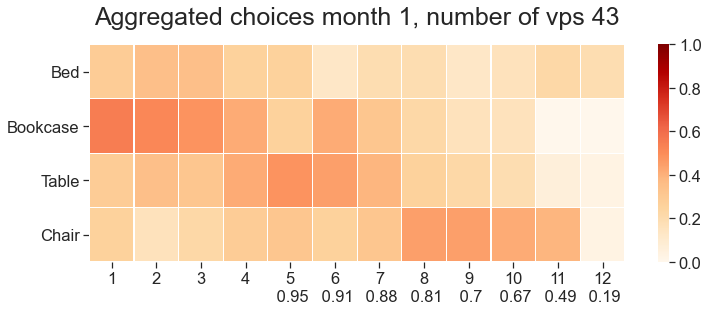

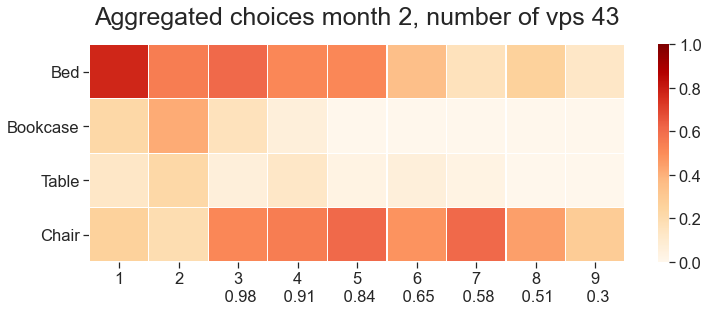

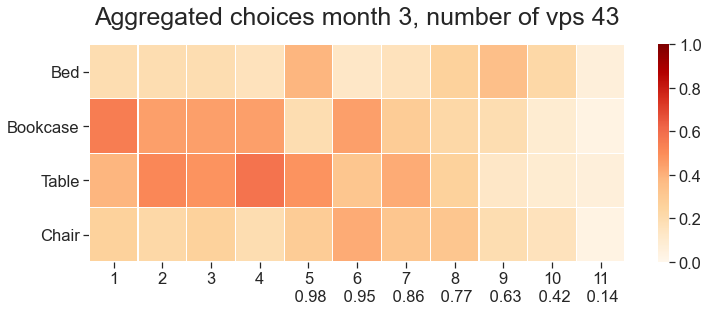

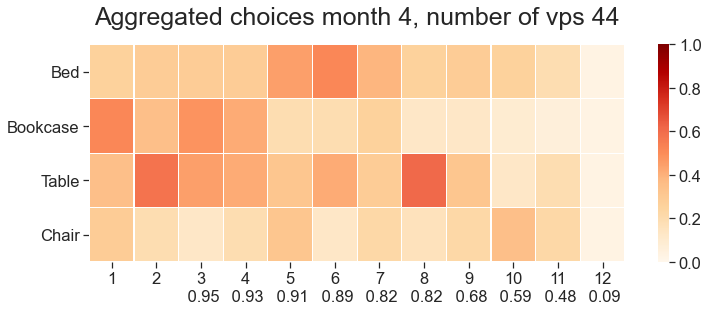

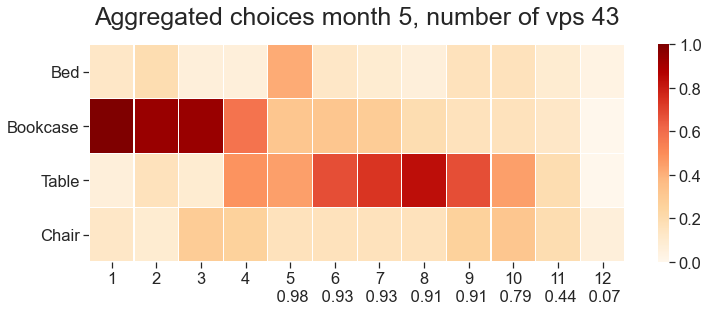

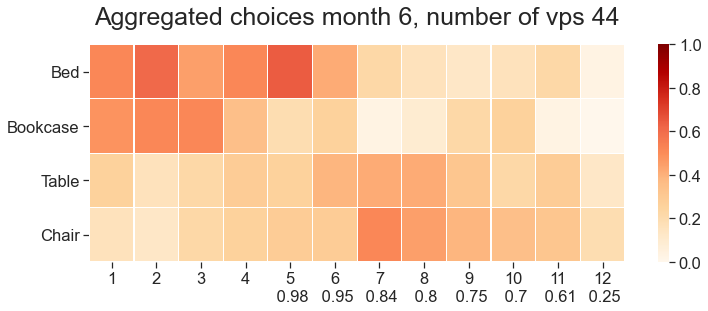

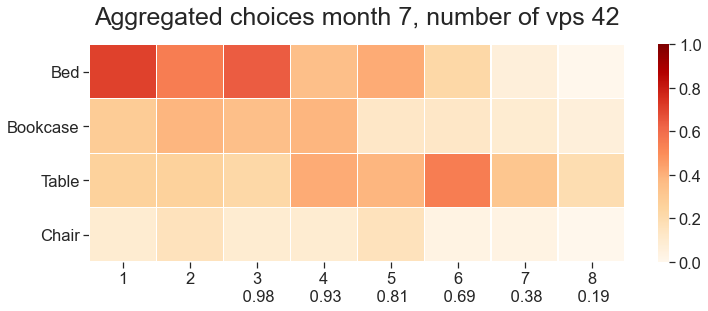

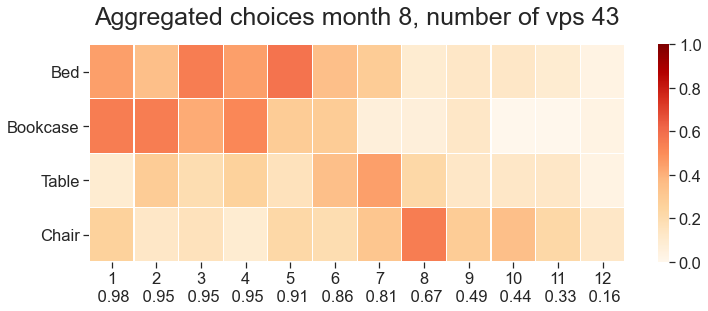

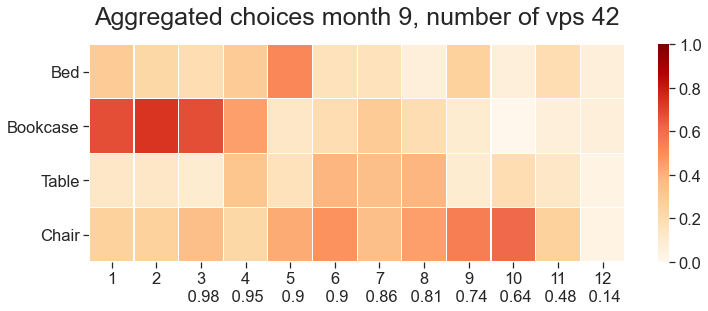

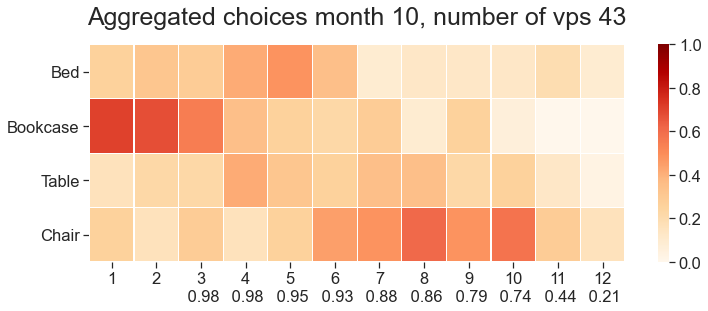

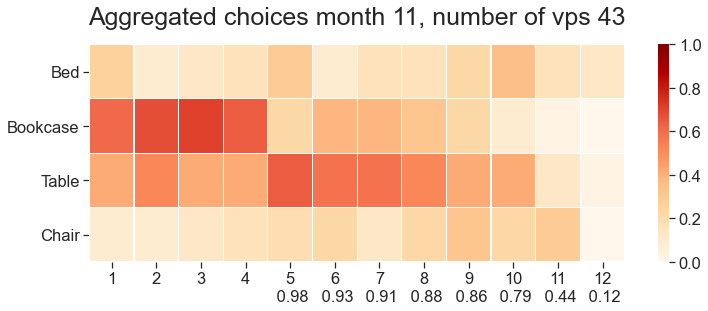

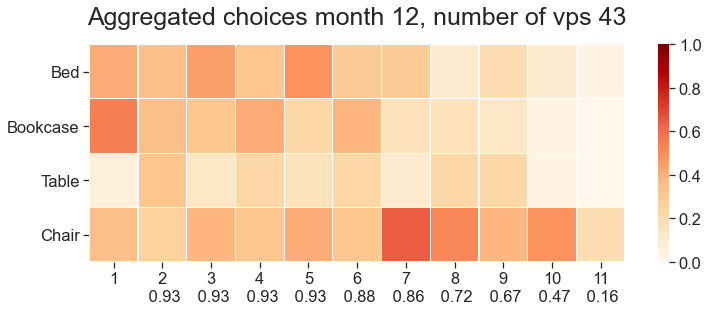

In [12]:
for m in range(1,13):
    plot_aggregated_decisions(m,  annot=False)     